### Fasi preliminari

1. verifico la versione di python utilizzata
2. installo il pacchetto pandas e lo importo

In [1]:
from platform import python_version

 # visualizzo la versione
python_version()

'3.9.7'

In [2]:
# installo il pacchetto pandas
!pip install pandas 

# importo la libreria 
import pandas as pd 

### 1. Importo i file .cvs con pandas


In [3]:
# importo il file .cvs tramite url da github - evitando di caricarlo dal disco locale.
# assengo il nome coffee_beans al file .cvs
coffee_beans = pd.read_csv("https://raw.githubusercontent.com/giancaman/Assignment-del-20-giugno-2022---Statistica-per-i-big-data/main/data-processed/coffee_beans.csv")

#richiamo il mio df a schermo cosi da visualizzarlo
coffee_beans

,coffee_id,species,variety,processing_method,color,country_of_origin,continent
0,1,Arabica,NaN,Washed / Wet,Green,Ethiopia,Africa
1,2,Arabica,Other,Washed / Wet,Green,Ethiopia,Africa
2,3,Arabica,Bourbon,NaN,NaN,Guatemala,North America
3,4,Arabica,NaN,Natural / Dry,Green,Ethiopia,Africa
4,5,Arabica,Other,Washed / Wet,Green,Ethiopia,Africa
...,...,...,...,...,...,...,...
1334,1335,Robusta,NaN,NaN,Blue-Green,Ecuador,South America
1335,1336,Robusta,NaN,NaN,Blue-Green,Ecuador,South America
1336,1337,Robusta,NaN,Natural / Dry,NaN,United States of America,North America
1337,1338,Robusta,NaN,Natural / Dry,Green,India,Asia


In [4]:
# eseguo la medesima procedura anche per il secondo file .csv
coffee_ratings = pd.read_csv("https://raw.githubusercontent.com/giancaman/Assignment-del-20-giugno-2022---Statistica-per-i-big-data/main/data-processed/coffee_ratings.csv")
coffee_ratings

,coffee_id,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,moisture
0,1,90.58,8.75,8.67,8.83,8.67,8.75,8.50,8.42,0.12
1,2,89.92,8.58,8.75,8.67,8.50,8.58,8.42,8.42,0.12
2,3,89.75,9.25,8.42,8.50,8.42,8.42,8.33,8.42,0.00
3,4,89.00,8.67,8.17,8.58,8.42,8.42,8.50,8.25,0.11
4,5,88.83,8.58,8.25,8.50,8.25,8.50,8.42,8.33,0.12
...,...,...,...,...,...,...,...,...,...,...
1334,1335,78.75,7.83,7.75,7.58,7.33,7.58,5.08,7.83,0.00
1335,1336,78.08,8.58,7.50,7.67,7.75,7.75,5.17,5.25,0.00
1336,1337,77.17,7.17,7.33,7.33,7.17,7.42,7.50,7.17,0.00
1337,1338,75.08,6.92,7.42,6.83,6.75,7.17,7.25,7.00,0.10


### 2. unisco le due tabelle usando la colonna coffee_id come riferimento

per unire le due tabelle uso la funzione .merge usando come colonna di riferimento "coffee_id"
e salvo il tutto in un nuovo df chiamato coffee_data_merged

In [5]:
coffee_data_merged = coffee_beans.merge(coffee_ratings,
                                       on = "coffee_id")
#visualizzo il mio nuovo df
coffee_data_merged.head() # .head() mi restituisce solo le prime 5 righe della tabella

,coffee_id,species,variety,processing_method,color,country_of_origin,continent,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,moisture
0,1,Arabica,NaN,Washed / Wet,Green,Ethiopia,Africa,90.58,8.75,8.67,8.83,8.67,8.75,8.50,8.42,0.12
1,2,Arabica,Other,Washed / Wet,Green,Ethiopia,Africa,89.92,8.58,8.75,8.67,8.50,8.58,8.42,8.42,0.12
2,3,Arabica,Bourbon,NaN,NaN,Guatemala,North America,89.75,9.25,8.42,8.50,8.42,8.42,8.33,8.42,0.00
3,4,Arabica,NaN,Natural / Dry,Green,Ethiopia,Africa,89.00,8.67,8.17,8.58,8.42,8.42,8.50,8.25,0.11
4,5,Arabica,Other,Washed / Wet,Green,Ethiopia,Africa,88.83,8.58,8.25,8.50,8.25,8.50,8.42,8.33,0.12


### 3.1 ispeziono la presenza di valori nulli
    3.2 elimino le colonne meno rilevanti per le mie analisi
       

In [6]:
coffee_data_merged.isnull() #.isnull() restituisce true se il mio valore è nullo, false se non nullo

,coffee_id,species,variety,processing_method,color,country_of_origin,continent,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,moisture
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1335,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1336,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
1337,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
coffee_data_merged.isnull().sum() # ispeziono quanti dati sono nulli per le varie etichette

coffee_id              0
species                0
variety              226
processing_method    170
color                218
country_of_origin      1
continent              3
total_cup_points       0
cupper_points          0
aroma                  0
flavor                 0
aftertaste             0
acidity                0
body                   0
balance                0
moisture               0
dtype: int64

Scelgo di eliminare le colonne: ["variety", "processing_method", "color"], perchè sono quelle con più valori nulli. 
Inoltre, elimino anche la colonna: ["moisture"], perchè presenta valori molto piccoli rispetto alle altre variabili e perciò non la ritengo significativa per le analisi future.

In [8]:
 # elimino le colonne selezionate e salvo il tutto nel df coffee_data_merged_reshaped
coffee_data_merged_reshaped = coffee_data_merged.drop(["variety",
                                                       "processing_method", 
                                                       "color",
                                                       "moisture" ], 
                                                      1)

C:\Users\matte\AppData\Local\Temp/ipykernel_1296/1179023462.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  coffee_data_merged_reshaped = coffee_data_merged.drop(["variety",


In [9]:
coffee_data_merged_reshaped.columns # controllo che le colonne siano state effetticvamente eliminate

Index(['coffee_id', 'species', 'country_of_origin', 'continent',
       'total_cup_points', 'cupper_points', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance'],
      dtype='object')

In [10]:
coffee_data_merged_reshaped

,coffee_id,species,country_of_origin,continent,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance
0,1,Arabica,Ethiopia,Africa,90.58,8.75,8.67,8.83,8.67,8.75,8.50,8.42
1,2,Arabica,Ethiopia,Africa,89.92,8.58,8.75,8.67,8.50,8.58,8.42,8.42
2,3,Arabica,Guatemala,North America,89.75,9.25,8.42,8.50,8.42,8.42,8.33,8.42
3,4,Arabica,Ethiopia,Africa,89.00,8.67,8.17,8.58,8.42,8.42,8.50,8.25
4,5,Arabica,Ethiopia,Africa,88.83,8.58,8.25,8.50,8.25,8.50,8.42,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1335,Robusta,Ecuador,South America,78.75,7.83,7.75,7.58,7.33,7.58,5.08,7.83
1335,1336,Robusta,Ecuador,South America,78.08,8.58,7.50,7.67,7.75,7.75,5.17,5.25
1336,1337,Robusta,United States of America,North America,77.17,7.17,7.33,7.33,7.17,7.42,7.50,7.17
1337,1338,Robusta,India,Asia,75.08,6.92,7.42,6.83,6.75,7.17,7.25,7.00


### 4. Creo una colonna con valori dummy
    se  total_cup_point > 82.5 --> = 1
                        < 82.5 --> = 0

In [11]:
# creo un ciclo for per assegnare il valore dummy al valore di total_cup_poing
# in ogni riga del df, infine aggiungo una colonna al df con i risultati di nome high_quality.

high_quality = []

for row in coffee_data_merged_reshaped["total_cup_points"]:
    if row > 82.5:
        high_quality.append(1)
    else:
        high_quality.append(0)

coffee_data_merged_reshaped["high_quality"] = high_quality

In [12]:
coffee_data_merged_reshaped #verifico che la mia colonna con i valori dummy è stata creata

,coffee_id,species,country_of_origin,continent,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
0,1,Arabica,Ethiopia,Africa,90.58,8.75,8.67,8.83,8.67,8.75,8.50,8.42,1
1,2,Arabica,Ethiopia,Africa,89.92,8.58,8.75,8.67,8.50,8.58,8.42,8.42,1
2,3,Arabica,Guatemala,North America,89.75,9.25,8.42,8.50,8.42,8.42,8.33,8.42,1
3,4,Arabica,Ethiopia,Africa,89.00,8.67,8.17,8.58,8.42,8.42,8.50,8.25,1
4,5,Arabica,Ethiopia,Africa,88.83,8.58,8.25,8.50,8.25,8.50,8.42,8.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1335,Robusta,Ecuador,South America,78.75,7.83,7.75,7.58,7.33,7.58,5.08,7.83,0
1335,1336,Robusta,Ecuador,South America,78.08,8.58,7.50,7.67,7.75,7.75,5.17,5.25,0
1336,1337,Robusta,United States of America,North America,77.17,7.17,7.33,7.33,7.17,7.42,7.50,7.17,0
1337,1338,Robusta,India,Asia,75.08,6.92,7.42,6.83,6.75,7.17,7.25,7.00,0


### 5. esporto il dataframe 

In [13]:
# salvo il mio df in .csv con il nome "coffe.csv"
coffee_data_merged_reshaped.to_csv("C:/Users/matte/Desktop/Assignment-del-20-giugno-2022---Statistica-per-i-big-data-main/data-modelling/coffe.csv.csv")

### 6.1 raggruppo i dati per paese di provenienza
#### 6.2 calcolo: valore minimo / massimo / media per la varibile total_cup_points.
#### 6.3 infine, li ordino in ordine descrescente in base alle media

##### 6.1 raggruppo i dati

raggruppo i dati per la variabile "country_of_origin" usando la funzione .groupby

In [14]:
coffee_by_country =  coffee_data_merged_reshaped.groupby("country_of_origin")

##### 6.2 valore minimo / massimo / media + altre informazioni del dataframe per paese

In [15]:
# valore minimo
coffee_by_country.min("total_cup_points").head() 

,coffee_id,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
country_of_origin,,,,,,,,,,
Brazil,6,70.67,6.67,6.83,6.58,6.58,6.83,6.83,6.42,0
Burundi,413,80.33,7.33,7.08,7.25,7.17,7.33,7.08,7.08,0
China,19,78.00,7.08,7.00,6.92,6.83,7.08,7.17,7.00,0
Colombia,48,72.83,6.92,5.08,7.00,6.75,5.25,5.25,7.17,0
Costa Rica,22,71.75,6.25,6.33,6.50,6.33,6.83,6.33,6.50,0


In [16]:
# valore massimo
coffee_by_country.max("total_cup_points").head()

,coffee_id,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
country_of_origin,,,,,,,,,,
Brazil,1303,88.83,8.50,8.58,8.50,8.42,8.50,8.33,8.33,1
Burundi,1087,83.33,7.83,7.75,7.67,7.33,7.50,7.50,7.75,1
China,1240,87.25,8.42,8.42,8.25,8.08,8.17,7.92,8.00,1
Colombia,1296,86.00,8.50,8.17,8.08,8.00,8.17,8.08,8.58,1
Costa Rica,1299,87.17,8.42,8.17,8.25,8.00,8.17,8.08,8.58,1


In [17]:
# valore medio
coffee_by_country.mean("total_cup_points").round(2).head()

,coffee_id,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
country_of_origin,,,,,,,,,,
Brazil,644.21,82.41,7.56,7.55,7.57,7.44,7.51,7.54,7.53,0.45
Burundi,750.00,81.83,7.58,7.42,7.46,7.25,7.42,7.29,7.42,0.50
China,516.62,82.93,7.65,7.64,7.63,7.48,7.58,7.57,7.55,0.69
Colombia,479.70,83.11,7.62,7.65,7.60,7.52,7.56,7.61,7.71,0.77
Costa Rica,539.75,82.79,7.66,7.67,7.54,7.53,7.57,7.54,7.64,0.59


##### 6.2 se voglio vedere solo il valore minimo / massimo / media per paese

In [18]:
# valore minimo
coffee_by_country_min = coffee_by_country["total_cup_points"].min("total_cup_points").head()
coffee_by_country_min.head()

country_of_origin
Brazil        70.67
Burundi       80.33
China         78.00
Colombia      72.83
Costa Rica    71.75
Name: total_cup_points, dtype: float64

In [19]:
# valore massimo
coffee_by_country_max = coffee_by_country["total_cup_points"].max("total_cup_points").head() 
coffee_by_country_max.head()

country_of_origin
Brazil        88.83
Burundi       83.33
China         87.25
Colombia      86.00
Costa Rica    87.17
Name: total_cup_points, dtype: float64

In [20]:
# valore medio
coffee_by_country_mean = coffee_by_country["total_cup_points"].mean("total_cup_points").round(2) 
coffee_by_country_mean.head()

country_of_origin
Brazil        82.41
Burundi       81.83
China         82.93
Colombia      83.11
Costa Rica    82.79
Name: total_cup_points, dtype: float64

In [21]:
coffee_by_country_mean.mean()  # media totale

82.04705882352941

In [22]:
coffee_by_country_min.min() # min totale

70.67

In [23]:
coffee_by_country_max.max() # max totale

88.83

##### 6.3 ordino in ordine decrescente i dati in base alla media

In [24]:
coffee_data_merged_reshaped.groupby("country_of_origin").mean().round(2).sort_values(("total_cup_points"),ascending = False)

,coffee_id,total_cup_points,cupper_points,aroma,flavor,aftertaste,acidity,body,balance,high_quality
country_of_origin,,,,,,,,,,
Papua New Guinea,62.00,85.75,7.92,8.33,8.42,7.83,8.33,8.00,8.25,1.00
Ethiopia,189.09,85.48,8.05,7.90,8.01,7.89,8.04,7.92,7.97,0.93
Japan,128.00,84.67,8.08,7.75,7.75,7.75,7.42,8.08,7.83,1.00
Kenya,249.76,84.31,7.71,7.79,7.78,7.71,7.87,7.73,7.80,0.92
Panama,442.75,83.71,7.64,7.67,7.62,7.60,7.70,7.58,7.88,0.75
Uganda,598.31,83.45,7.74,7.88,7.75,7.62,7.71,7.72,7.66,0.78
Colombia,479.70,83.11,7.62,7.65,7.60,7.52,7.56,7.61,7.71,0.77
El Salvador,525.62,83.05,7.56,7.67,7.65,7.57,7.59,7.61,7.71,0.71
China,516.62,82.93,7.65,7.64,7.63,7.48,7.58,7.57,7.55,0.69


### 7. creo il grafico


disegno un grafico con i paesi sull’asse x e sull’asse y la media di total_cup_points.
successivamente individuo i punti che esprimono il valore minimo, medio e massimo.

In [25]:
# importo due librerie 
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# identiico le due colonne del df cocoffee_data_merged_reshaped
# che userò per il grafico
coffee_country_cup = coffee_data_merged_reshaped[["country_of_origin", "total_cup_points"]] 
coffee_country_cup.head()

,country_of_origin,total_cup_points
0,Ethiopia,90.58
1,Ethiopia,89.92
2,Guatemala,89.75
3,Ethiopia,89.00
4,Ethiopia,88.83


In [27]:
# raggruppo per paese di origine
coffee_country_cup_df = coffee_country_cup.groupby(["country_of_origin"]) 

In [28]:
# raggruppo per paese e ne calcolo la media
coffe_data_plot = coffee_country_cup_df.aggregate(np.mean).round(2) 
coffe_data_plot.head()

,total_cup_points
country_of_origin,
Brazil,82.41
Burundi,81.83
China,82.93
Colombia,83.11
Costa Rica,82.79


In [29]:
coffe_data_plot.max() # calcolo il valore max dei valori medi

total_cup_points    85.75
dtype: float64

In [30]:
coffe_data_plot.mean() # calcolo il valore medio dei valori medi

total_cup_points    82.047059
dtype: float64

In [31]:
coffe_data_plot.min() # calcolo il valore min dei valori medi

total_cup_points    77.18
dtype: float64

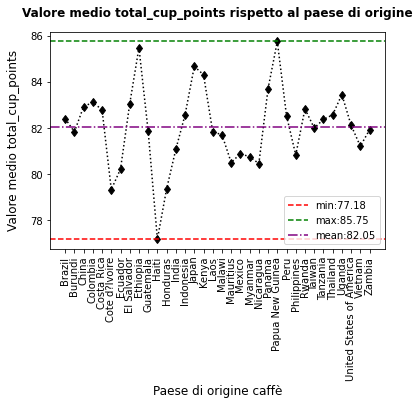

In [32]:
fig, ax = plt.subplots()

# disegno il grafico 
ax.plot(coffe_data_plot, # scelgo i dati da plottare
       color = "black", # scelgo il colore delle linee del grafico
       linestyle = ":", # lo stile della linea
       marker = "d", # il tipo di punto dei valori, in questo caso thin diamond
       )
# faccio delle modifiche grafiche 
plt.xticks(rotation = 90) # ruoto di 90° il testo sull'asse delle x
# aggiungo titolo principale e degli assi
plt.xlabel("Paese di origine caffè",
          fontsize = 12) # modifico la dimensione del carattere
plt.ylabel("Valore medio total_cup_points",
          fontsize = 12, 
          labelpad = 10) # modifico la distanza dell'asse rispetto al grafico
plt.title("Valore medio total_cup_points rispetto al paese di origine",
         weight = "bold", # metto il titolo in grassetto
         pad = 15)

#aggiungo 3 linee che rappresentano il punto min / mean / max 
plt.axhline(y = 77.18, 
            color = "red",
           linestyle = "--",
           label = "min:77.18", 
           )
plt.axhline(y = 85.75, 
            color = "green",
           linestyle = "--",
           label = "max:85.75")
plt.axhline(y = 82.047059, 
            color = "purple",
           linestyle = "-.",
           label = "mean:82.05")

# creo una legenda 
plt.legend(loc = "lower right") 

#salvo il grafico come immagine .jpeg
plt.savefig("C:/Users/matte/Desktop/Assignment-del-20-giugno-2022---Statistica-per-i-big-data-main/Python_notebook/plot_part_1.jpeg",
           transparent = False,
           facecolor = "white",
           edgecolor = "white",
           bbox_inches = 'tight')

#mostro il grafico
plt.show()